In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


**Prepare Dataset**

In [38]:
white = pd.read_csv('winequality-white.csv', sep=';')
red = pd.read_csv('winequality-red.csv', sep=';')

In [39]:
print(white.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


 Add wine color as an additional variable

In [40]:
white['color'] = 'white'
red['color'] = 'red'
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6  white  
1      9.5        6  white  

In [41]:
print(red.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2 

Combine red wine and white wine into one dataset

In [42]:
wine = pd.concat([red, white], ignore_index=True)
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2 

**Data Preprocess**

One-hot encoding was applied to the 'color' variable to convert it into a binary format, allowing machine learning models to process the categorical information numerically.

Specifically:

color_white = 1 → the wine is white

color_white = 0 → the wine is red

In [50]:
wine_encoded = pd.get_dummies(wine, columns=['color'], drop_first=True, dtype=int)
print(wine_encoded.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color_white  
0      9.4        5            0  
1      9.8      

Plot a correlation matrix to observe relationships between the wine dataset variables.

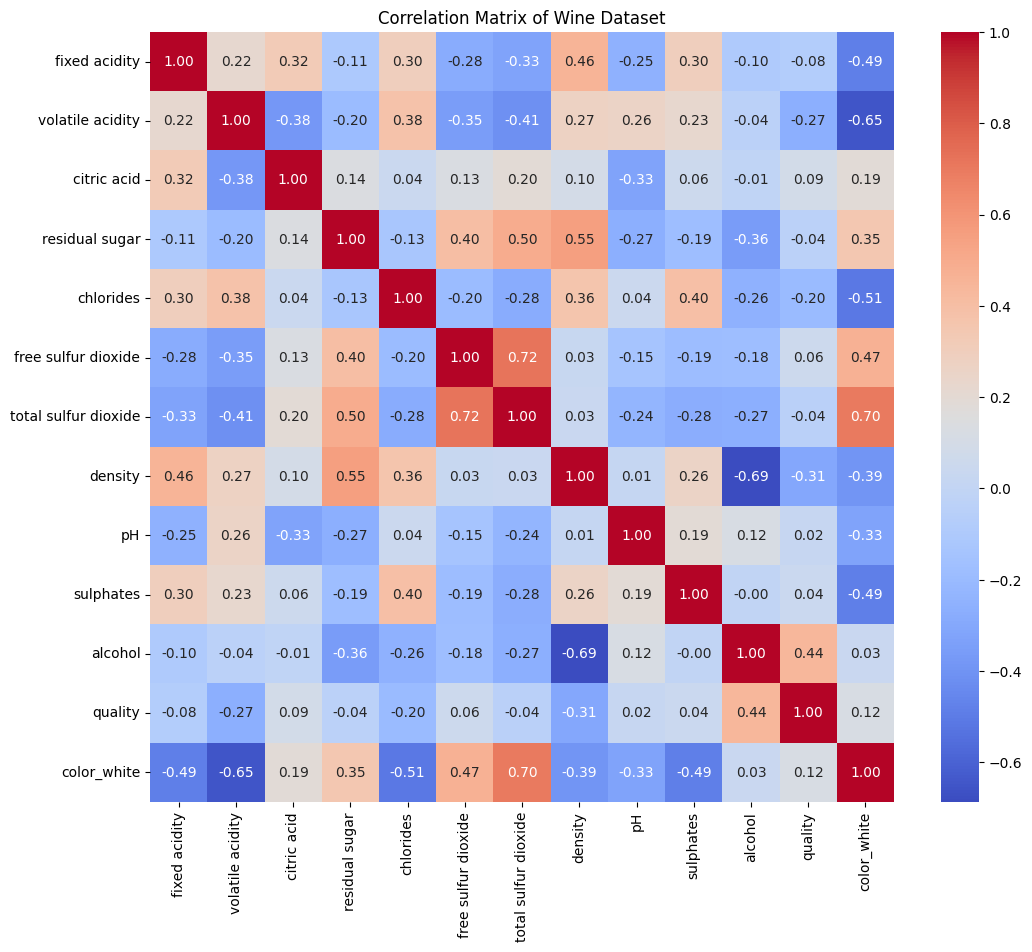

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(wine_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Dataset')
plt.show()

Scaling the numerical features to prepare for model training:

Numerical features were scaled to ensure they were on a comparable scale for subsequent model training.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Separate features and target
X = wine_encoded.drop('quality', axis=1)
y = wine_encoded['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Linear models**

Linear Regression use all features (as a baseline model)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f" Train MSE: {train_mse:.4f}")
print(f" Test MSE: {test_mse:.4f}")
print(f" Train R²: {train_r2:.4f}")
print(f" Test R²: {test_r2:.4f}")

 Train MSE: 0.5356
 Test MSE: 0.5412
 Train R²: 0.3029
 Test R²: 0.2672


Feature Selection: Wrapper Methods for Linear Regression

1. Forward selection

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Create MSE scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize model
lr = LinearRegression()

# Forward selection based on MSE
sfs_forward_mse = SequentialFeatureSelector(
    estimator=lr,
    direction='forward',
    scoring=mse_scorer,
    cv=5,
    n_jobs=-1  # use all CPU cores
)

# Fit on training data
sfs_forward_mse.fit(X_train_scaled, y_train)

# Selected features
selected_forward = sfs_forward_mse.get_support()
selected_features_forward = X.columns[selected_forward]

print(" Forward Selection based on MSE chose features:")
print(selected_features_forward.tolist())

# Select columns
X_train_selected = X_train_scaled[:, selected_forward]
X_test_selected = X_test_scaled[:, selected_forward]

# Train linear model on selected features
lr_selected = LinearRegression()
lr_selected.fit(X_train_selected, y_train)

# Predict on train and test
y_train_pred = lr_selected.predict(X_train_selected)
y_test_pred = lr_selected.predict(X_test_selected)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f" Train MSE: {train_mse:.4f}")
print(f" Test MSE: {test_mse:.4f}")
print(f" Train R²: {train_r2:.4f}")
print(f" Test R²: {test_r2:.4f}")


 Forward Selection based on MSE chose features:
['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'sulphates', 'alcohol', 'color_white']
 Train MSE: 0.5447
 Test MSE: 0.5468
 Train R²: 0.2911
 Test R²: 0.2596


2. Backward selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# Create MSE scorer (same as before)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize model
lr = LinearRegression()

# Backward selection using MSE
sfs_backward_mse = SequentialFeatureSelector(
    estimator=lr,
    direction='backward',
    scoring=mse_scorer,
    cv=5,
    n_jobs=-1  # Use all CPU cores
)

# Fit on training data
sfs_backward_mse.fit(X_train_scaled, y_train)

# Selected features
selected_backward = sfs_backward_mse.get_support()
selected_features_backward = X.columns[selected_backward]

print(" Backward Selection based on MSE chose features:")
print(selected_features_backward.tolist())

# Select columns
X_train_selected_back = X_train_scaled[:, selected_backward]
X_test_selected_back = X_test_scaled[:, selected_backward]

# Train linear model on selected features
lr_selected_back = LinearRegression()
lr_selected_back.fit(X_train_selected_back, y_train)

# Predict on train and test
y_train_pred_back = lr_selected_back.predict(X_train_selected_back)
y_test_pred_back = lr_selected_back.predict(X_test_selected_back)

# Calculate metrics
train_mse_back = mean_squared_error(y_train, y_train_pred_back)
test_mse_back = mean_squared_error(y_test, y_test_pred_back)
train_r2_back = r2_score(y_train, y_train_pred_back)
test_r2_back = r2_score(y_test, y_test_pred_back)

print(f" Train MSE: {train_mse_back:.4f}")
print(f" Test MSE: {test_mse_back:.4f}")
print(f" Train R²: {train_r2_back:.4f}")
print(f" Test R²: {test_r2_back:.4f}")


 Backward Selection based on MSE chose features:
['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']
 Train MSE: 0.5421
 Test MSE: 0.5475
 Train R²: 0.2945
 Test R²: 0.2587


3. Best subset selection

In [46]:
pip install mlxtend

We set the maximum number of features to 6 for subset selection, because both forward and backward selection identified 6 features as the optimal subset.

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
lr = LinearRegression()

# Best Subset Selection (Exhaustive Search)
efs = ExhaustiveFeatureSelector(
    estimator=lr,
    min_features=1,
    max_features=6,
    scoring='neg_mean_squared_error',  # negative MSE, because mlxtend expects higher is better
    cv=5,
    n_jobs=-1
)

# Fit on training data
efs = efs.fit(X_train_scaled, y_train)

# Selected features
best_subset_indices = list(efs.best_idx_)
selected_features_best_subset = X.columns[best_subset_indices]

print(" Best Subset Selection chose features:")
print(selected_features_best_subset.tolist())

# Select columns
X_train_selected_best = X_train_scaled[:, best_subset_indices]
X_test_selected_best = X_test_scaled[:, best_subset_indices]

# Train linear model on selected features
lr_selected_best = LinearRegression()
lr_selected_best.fit(X_train_selected_best, y_train)

# Predict on train and test
y_train_pred_best = lr_selected_best.predict(X_train_selected_best)
y_test_pred_best = lr_selected_best.predict(X_test_selected_best)

# Calculate metrics
train_mse_best = mean_squared_error(y_train, y_train_pred_best)
test_mse_best = mean_squared_error(y_test, y_test_pred_best)
train_r2_best = r2_score(y_train, y_train_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)

print(f" Train MSE: {train_mse_best:.4f}")
print(f" Test MSE: {test_mse_best:.4f}")
print(f" Train R²: {train_r2_best:.4f}")
print(f" Test R²: {test_r2_best:.4f}")


Features: 2509/2509

 Best Subset Selection chose features:
['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']
 Train MSE: 0.5421
 Test MSE: 0.5475
 Train R²: 0.2945
 Test R²: 0.2587


Since feature selection did not significantly improve performance, we decided to stay with the baseline full-feature linear model.

There are several reasons supporting this decision:
- More Information: The full model uses all available features, capturing relationships that feature selection might miss.
- Robustness: Especially for linear models, when overfitting isn't severe, retaining all features can sometimes lead to better generalization.

Since keeping all features preserves information, we can still apply regularization techniques (such as Ridge and Lasso) to address potential multicollinearity. And we explored in the next step by training and evaluating Ridge and Lasso regression models.

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize Ridge model
ridge = Ridge()

# Set up a grid of alpha values (regularization strength)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 15, 18, 20, 25, 30, 35, 40]}

# Use GridSearchCV to find the best alpha
ridge_cv = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
ridge_cv.fit(X_train_scaled, y_train)

# Best alpha found
best_alpha = ridge_cv.best_params_['alpha']
print(f" Best alpha for Ridge: {best_alpha}")

# Train Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)

# Predict
y_train_pred_ridge = ridge_best.predict(X_train_scaled)
y_test_pred_ridge = ridge_best.predict(X_test_scaled)

# Evaluate
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f" Ridge Train MSE: {train_mse_ridge:.4f}")
print(f" Ridge Test MSE: {test_mse_ridge:.4f}")
print(f" Ridge Train R²: {train_r2_ridge:.4f}")
print(f" Ridge Test R²: {test_r2_ridge:.4f}")


 Best alpha for Ridge: 30
 Ridge Train MSE: 0.5357
 Ridge Test MSE: 0.5409
 Ridge Train R²: 0.3028
 Ridge Test R²: 0.2676


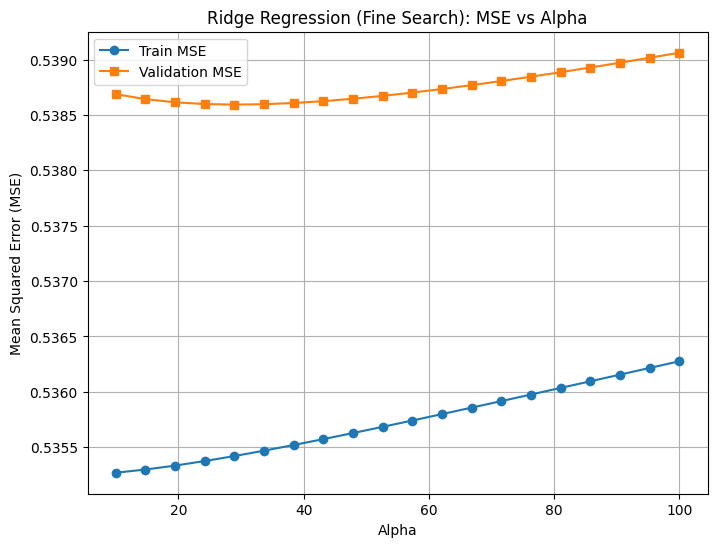

 Best fine-tuned alpha: 28.94736842105263


In [ ]:
alphas_fine = np.linspace(10, 100, 20)  # 20 points between 10 and 100

ridge_cv_fine = GridSearchCV(
    Ridge(),
    param_grid={'alpha': alphas_fine},
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)

ridge_cv_fine.fit(X_train_scaled, y_train)

# Plot again if you want
cv_results_fine = ridge_cv_fine.cv_results_

mean_train_mse_fine = -cv_results_fine['mean_train_score']
mean_val_mse_fine = -cv_results_fine['mean_test_score']

plt.figure(figsize=(8, 6))
plt.plot(alphas_fine, mean_train_mse_fine, marker='o', label='Train MSE')
plt.plot(alphas_fine, mean_val_mse_fine, marker='s', label='Validation MSE')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Ridge Regression (Fine Search): MSE vs Alpha')
plt.legend()
plt.grid(True)
plt.show()

# Best alpha after fine search
print(f" Best fine-tuned alpha: {ridge_cv_fine.best_params_['alpha']}")

Final Ridge model using this alpha:

In [ ]:
ridge_final = Ridge(alpha=29)
ridge_final.fit(X_train_scaled, y_train)

# Predict
y_train_pred_ridge = ridge_final.predict(X_train_scaled)
y_test_pred_ridge = ridge_final.predict(X_test_scaled)

# Evaluate
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f" Ridge Train MSE: {train_mse_ridge:.4f}")
print(f" Ridge Test MSE: {test_mse_ridge:.4f}")
print(f" Ridge Train R²: {train_r2_ridge:.4f}")
print(f" Ridge Test R²: {test_r2_ridge:.4f}")

 Ridge Train MSE: 0.5357
 Ridge Test MSE: 0.5410
 Ridge Train R²: 0.3028
 Ridge Test R²: 0.2675


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas_lasso_refined = np.logspace(-4, 0, 50)  # log scale grid from 0.0001 to 1

lasso_cv_refined = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid={'alpha': alphas_lasso_refined},
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)

lasso_cv_refined.fit(X_train_scaled, y_train)

best_alpha_lasso_refined = lasso_cv_refined.best_params_['alpha']
print(f"Best alpha for Lasso: {best_alpha_lasso_refined:.6f}")

Best alpha for Lasso: 0.000954


 Best alpha for Lasso: 0.000954


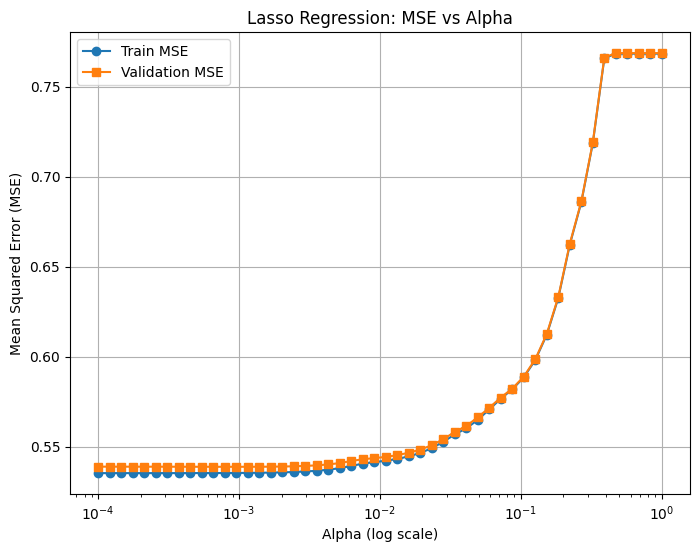

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Refined alpha grid: log scale from 0.0001 to 1
alphas_lasso_refined = np.logspace(-4, 0, 50)

# GridSearchCV for Lasso
lasso_cv = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid={'alpha': alphas_lasso_refined},
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)

lasso_cv.fit(X_train_scaled, y_train)

# Best alpha
best_alpha_lasso = lasso_cv.best_params_['alpha']
print(f" Best alpha for Lasso: {best_alpha_lasso:.6f}")

# Extract CV results
cv_results_lasso = lasso_cv.cv_results_

mean_train_mse_lasso = -cv_results_lasso['mean_train_score']  # make positive
mean_val_mse_lasso = -cv_results_lasso['mean_test_score']     # make positive

# Plot
plt.figure(figsize=(8, 6))
plt.plot(alphas_lasso_refined, mean_train_mse_lasso, marker='o', label='Train MSE')
plt.plot(alphas_lasso_refined, mean_val_mse_lasso, marker='s', label='Validation MSE')
plt.xscale('log')  # Important for Lasso because alpha is log-scaled
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Lasso Regression: MSE vs Alpha')
plt.legend()
plt.grid(True)
plt.show()


Final Lasso regression use this alpha

In [ ]:
# Final Lasso model
lasso_final = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

# Predict
y_train_pred_lasso = lasso_final.predict(X_train_scaled)
y_test_pred_lasso = lasso_final.predict(X_test_scaled)

# Evaluate
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f" Lasso Train MSE: {train_mse_lasso:.4f}")
print(f" Lasso Test MSE: {test_mse_lasso:.4f}")
print(f" Lasso Train R²: {train_r2_lasso:.4f}")
print(f" Lasso Test R²: {test_r2_lasso:.4f}")
nonzero_features = np.sum(lasso_final.coef_ != 0)
print(f" Number of features kept by Lasso: {nonzero_features} out of {X.shape[1]}")

 Lasso Train MSE: 0.5357
 Lasso Test MSE: 0.5408
 Lasso Train R²: 0.3028
 Lasso Test R²: 0.2677
 Number of features kept by Lasso: 12 out of 12


Summary for Linear Models performance:

After evaluating Linear Regression, Ridge Regression, and Lasso Regression models, Lasso demonstrated the best performance based on Test MSE and R² scores. A detailed interpretation of the comparison of all linear models’ performances is provided in a separate documentation file.

**Nonlinear and Ensemble Learning Models**

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model with basic parameters (can tune later)
dtree = DecisionTreeRegressor(random_state=42)

# Fit on training data
dtree.fit(X_train_scaled, y_train)

# Predict on train and test
y_train_pred_dt = dtree.predict(X_train_scaled)
y_test_pred_dt = dtree.predict(X_test_scaled)

# Evaluate
train_mse_dt = mean_squared_error(y_train, y_train_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
train_r2_dt = r2_score(y_train, y_train_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

# Print results
print(" Decision Tree Results")
print(f"Train MSE: {train_mse_dt:.4f}")
print(f"Test MSE:  {test_mse_dt:.4f}")
print(f"Train R²:  {train_r2_dt:.4f}")
print(f"Test R²:   {test_r2_dt:.4f}")


 Decision Tree Results
Train MSE: 0.0000
Test MSE:  0.7123
Train R²:  1.0000
Test R²:   0.0355


Tune Decision Tree with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Set up parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [3, 5, 10, 15, 20]
}

# Initialize basic Decision Tree
dtree = DecisionTreeRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # minimize MSE
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearch
grid_search.fit(X_train_scaled, y_train)

# Best model
best_dtree = grid_search.best_estimator_

print("Best Decision Tree Parameters:")
print(grid_search.best_params_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Decision Tree Parameters:
{'max_depth': 5, 'min_samples_leaf': 15, 'min_samples_split': 2}


In [ ]:
# Predict with best tree
y_train_pred_bestdt = best_dtree.predict(X_train_scaled)
y_test_pred_bestdt = best_dtree.predict(X_test_scaled)

# Evaluate
train_mse_bestdt = mean_squared_error(y_train, y_train_pred_bestdt)
test_mse_bestdt = mean_squared_error(y_test, y_test_pred_bestdt)
train_r2_bestdt = r2_score(y_train, y_train_pred_bestdt)
test_r2_bestdt = r2_score(y_test, y_test_pred_bestdt)

print(f" Best Decision Tree Train MSE: {train_mse_bestdt:.4f}")
print(f" Best Decision Tree Test MSE: {test_mse_bestdt:.4f}")
print(f" Best Decision Tree Train R²: {train_r2_bestdt:.4f}")
print(f" Best Decision Tree Test R²: {test_r2_bestdt:.4f}")


 Best Decision Tree Train MSE: 0.4880
 Best Decision Tree Test MSE: 0.5522
 Best Decision Tree Train R²: 0.3648
 Best Decision Tree Test R²: 0.2524


After tuning, the Decision Tree showed some improvement, but the overall performance was still poor, indicating that more complex models are needed for better prediction.

Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize basic Gradient Boosting model
gbr = GradientBoostingRegressor(random_state=42)

# Fit on training data
gbr.fit(X_train_scaled, y_train)

# Predict
y_train_pred_gbr = gbr.predict(X_train_scaled)
y_test_pred_gbr = gbr.predict(X_test_scaled)

# Evaluate
train_mse_gbr = mean_squared_error(y_train, y_train_pred_gbr)
test_mse_gbr = mean_squared_error(y_test, y_test_pred_gbr)
train_r2_gbr = r2_score(y_train, y_train_pred_gbr)
test_r2_gbr = r2_score(y_test, y_test_pred_gbr)

# Print results
print("Gradient Boosting Results")
print(f"Train MSE: {train_mse_gbr:.4f}")
print(f"Test MSE:  {test_mse_gbr:.4f}")
print(f"Train R²:  {train_r2_gbr:.4f}")
print(f"Test R²:   {test_r2_gbr:.4f}")

Gradient Boosting Results
Train MSE: 0.4027
Test MSE:  0.4604
Train R²:  0.4759
Test R²:   0.3766


Tune Gradient Boosting Regressor with GridSearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Set up parameter grid
param_grid_gbr = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize basic model
gbr = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
grid_search_gbr = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid_gbr,
    scoring='neg_mean_squared_error',  # minimize MSE
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit
grid_search_gbr.fit(X_train_scaled, y_train)

# Best model
best_gbr = grid_search_gbr.best_estimator_

print(" Best Gradient Boosting Parameters:")
print(grid_search_gbr.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
 Best Gradient Boosting Parameters:
{'learning_rate': 0.05, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
# Predict with best Gradient Boosting model
y_train_pred_bestgbr = best_gbr.predict(X_train_scaled)
y_test_pred_bestgbr = best_gbr.predict(X_test_scaled)

# Evaluate
train_mse_bestgbr = mean_squared_error(y_train, y_train_pred_bestgbr)
test_mse_bestgbr = mean_squared_error(y_test, y_test_pred_bestgbr)
train_r2_bestgbr = r2_score(y_train, y_train_pred_bestgbr)
test_r2_bestgbr = r2_score(y_test, y_test_pred_bestgbr)

print(" Tuned Gradient Boosting Results")
print(f"Train MSE: {train_mse_bestgbr:.4f}")
print(f"Test MSE:  {test_mse_bestgbr:.4f}")
print(f"Train R²:  {train_r2_bestgbr:.4f}")
print(f"Test R²:   {test_r2_bestgbr:.4f}")

 Tuned Gradient Boosting Results
Train MSE: 0.0379
Test MSE:  0.3840
Train R²:  0.9506
Test R²:   0.4800


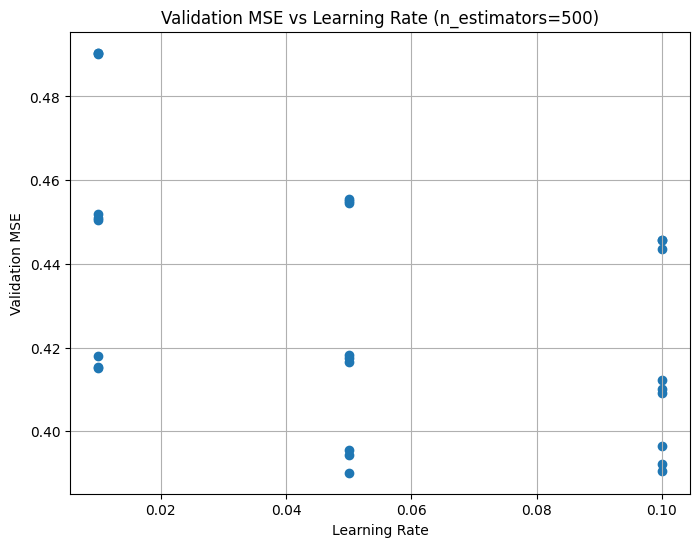

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert cv_results_ to a DataFrame if you haven't already
cv_results_gbr = pd.DataFrame(grid_search_gbr.cv_results_)

# Focus on entries with the best n_estimators (for cleaner comparison)
best_n_estimators = grid_search_gbr.best_params_['n_estimators']

# Filter the subset where n_estimators == best_n_estimators
subset_lr = cv_results_gbr[cv_results_gbr.param_n_estimators == best_n_estimators]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(subset_lr['param_learning_rate'], -subset_lr['mean_test_score'], marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Validation MSE')
plt.title(f'Validation MSE vs Learning Rate (n_estimators={best_n_estimators})')
plt.grid(True)
plt.show()

Get feature importances from the tuned best GB model

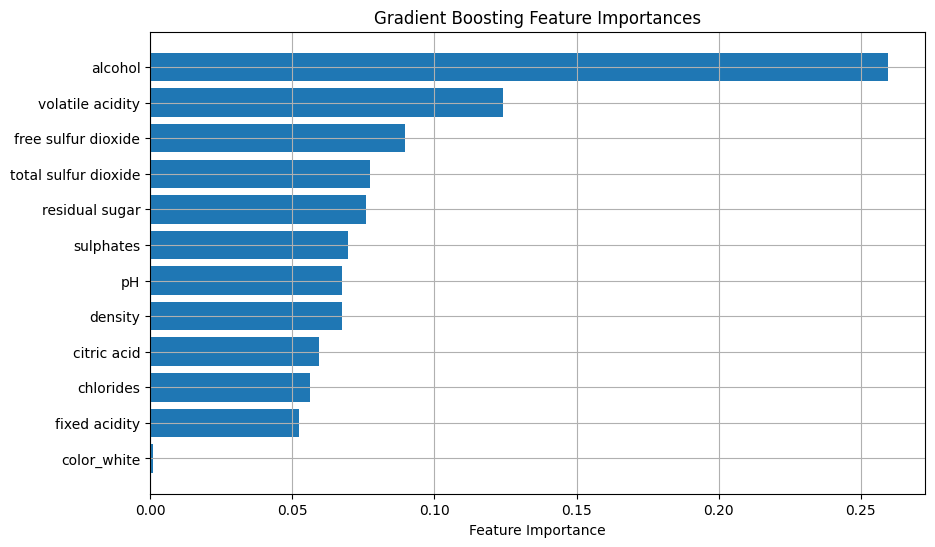

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the trained best GB model
importances_gb = best_gbr.feature_importances_

# Create a DataFrame
importance_df_gb = pd.DataFrame({
    'Feature': X_train.columns,  # original feature names
    'Importance': importances_gb
})

# Sort by importance descending
importance_df_gb = importance_df_gb.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df_gb['Feature'], importance_df_gb['Importance'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Feature Importances')
plt.grid(True)
plt.show()

We selected the Top K features based on feature importances from the full-feature Gradient Boosting model, then retrained the model to evaluate its performance on the reduced feature set.

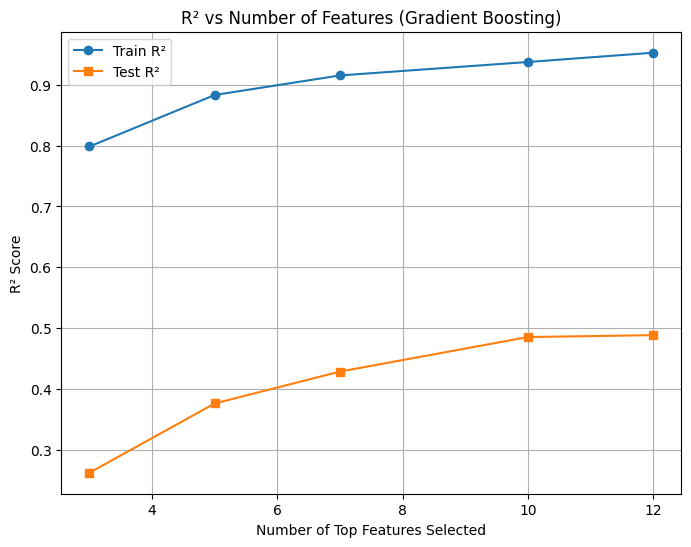

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Try different numbers of top features
top_ks = [3, 5, 7, 10, 12]  # You can add more if you want

train_r2_scores = []
test_r2_scores = []

for K in top_ks:
    # Select Top K features
    selected_features = importance_df_gb['Feature'].iloc[:K].tolist()

    # Subset training and test data
    X_train_topk = X_train_scaled[:, [X_train.columns.get_loc(f) for f in selected_features]]
    X_test_topk = X_test_scaled[:, [X_train.columns.get_loc(f) for f in selected_features]]

    # Train Gradient Boosting Regressor with same best parameters
    gbr_topk = GradientBoostingRegressor(
        n_estimators=grid_search_gbr.best_params_['n_estimators'],
        learning_rate=grid_search_gbr.best_params_['learning_rate'],
        max_depth=grid_search_gbr.best_params_['max_depth'],
        min_samples_split=grid_search_gbr.best_params_['min_samples_split'],
        random_state=42
    )

    gbr_topk.fit(X_train_topk, y_train)

    # Predict and evaluate
    y_train_pred_topk = gbr_topk.predict(X_train_topk)
    y_test_pred_topk = gbr_topk.predict(X_test_topk)

    train_r2 = r2_score(y_train, y_train_pred_topk)
    test_r2 = r2_score(y_test, y_test_pred_topk)

    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(top_ks, train_r2_scores, marker='o', label='Train R²')
plt.plot(top_ks, test_r2_scores, marker='s', label='Test R²')
plt.xlabel('Number of Top Features Selected')
plt.ylabel('R² Score')
plt.title('R² vs Number of Features (Gradient Boosting)')
plt.grid(True)
plt.legend()
plt.show()

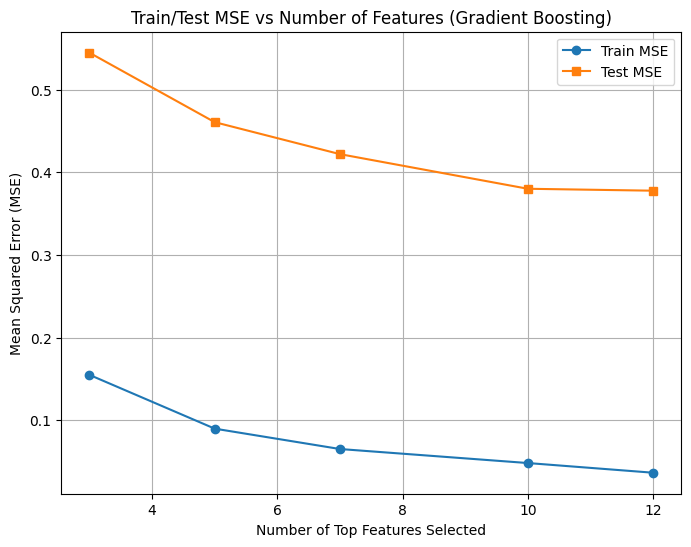

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Try different numbers of top features
top_ks = [3, 5, 7, 10, 12]  # Adjust as needed

train_mse_scores = []
test_mse_scores = []

for K in top_ks:
    # Select Top K features
    selected_features = importance_df_gb['Feature'].iloc[:K].tolist()

    # Subset training and test data
    X_train_topk = X_train_scaled[:, [X_train.columns.get_loc(f) for f in selected_features]]
    X_test_topk = X_test_scaled[:, [X_train.columns.get_loc(f) for f in selected_features]]

    # Train Gradient Boosting Regressor
    gbr_topk = GradientBoostingRegressor(
        n_estimators=grid_search_gbr.best_params_['n_estimators'],
        learning_rate=grid_search_gbr.best_params_['learning_rate'],
        max_depth=grid_search_gbr.best_params_['max_depth'],
        min_samples_split=grid_search_gbr.best_params_['min_samples_split'],
        random_state=42
    )

    gbr_topk.fit(X_train_topk, y_train)

    # Predict and evaluate
    y_train_pred_topk = gbr_topk.predict(X_train_topk)
    y_test_pred_topk = gbr_topk.predict(X_test_topk)

    train_mse = mean_squared_error(y_train, y_train_pred_topk)
    test_mse = mean_squared_error(y_test, y_test_pred_topk)

    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(top_ks, train_mse_scores, marker='o', label='Train MSE')
plt.plot(top_ks, test_mse_scores, marker='s', label='Test MSE')
plt.xlabel('Number of Top Features Selected')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train/Test MSE vs Number of Features (Gradient Boosting)')
plt.grid(True)
plt.legend()
plt.show()

Since the full feature set achieved the best Test R² and lowest Test MSE, we decided to keep all features for the final Gradient Boosting model.

Random Forest (uses bagging by default with bootstrap=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest
rf = RandomForestRegressor(
    oob_score=True,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Fit the model
rf.fit(X_train_scaled, y_train)

# Predict on train and test sets
y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

# Evaluate
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Print results
print(" Random Forest Results (with OOB)")
print(f"Train MSE: {train_mse_rf:.4f}")
print(f"Test MSE:  {test_mse_rf:.4f}")
print(f"Train R²:  {train_r2_rf:.4f}")
print(f"Test R²:   {test_r2_rf:.4f}")
print(f"OOB R²:    {rf.oob_score_:.4f}")



 Random Forest Results (with OOB)
Train MSE: 0.0516
Test MSE:  0.3693
Train R²:  0.9328
Test R²:   0.5000
OOB R²:    0.5077


 OOB R² ≈ Test R² ➔ Model generalizes well

 The Out-of-Bag (OOB) R² score is very close to the Test R² score, indicating that the Random Forest model generalizes well to unseen data.

Tune the Random Forest using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Set up hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 500],        # number of trees
    'max_depth': [None, 5, 10, 20],          # depth of each tree
    'min_samples_split': [2, 5, 10],         # minimum samples to split a node
    'min_samples_leaf': [1, 2, 5],           # minimum samples at a leaf
}

# Initialize basic Random Forest
rf = RandomForestRegressor(
    oob_score=True,        # Keep OOB scoring
    bootstrap=True,        # Default Random Forest
    random_state=42,
    n_jobs=-1
)

# GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',  # minimize MSE
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

# Fit GridSearch
grid_search_rf.fit(X_train_scaled, y_train)

# Best model
best_rf = grid_search_rf.best_estimator_

print(" Best Random Forest Parameters:")
print(grid_search_rf.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
 Best Random Forest Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


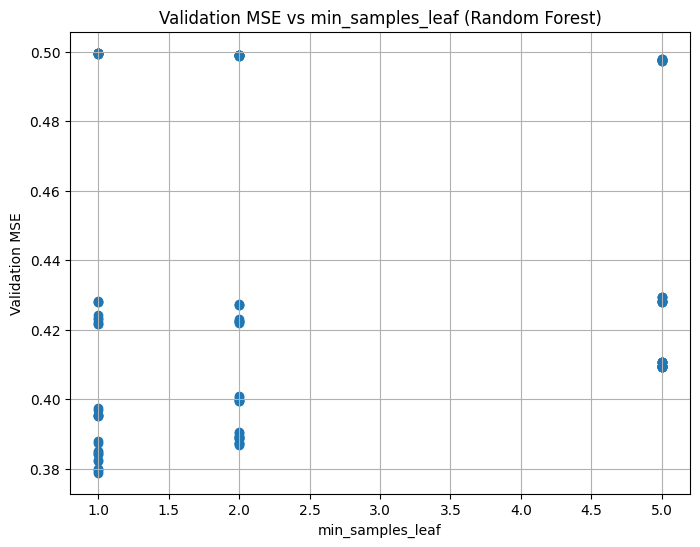

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume cv_results_rf is already created
plt.figure(figsize=(8, 6))

# Use scatter instead of plot
plt.scatter(
    cv_results_rf['param_min_samples_leaf'],
    -cv_results_rf['mean_test_score'],
    marker='o'
)

plt.xlabel('min_samples_leaf')
plt.ylabel('Validation MSE')
plt.title('Validation MSE vs min_samples_leaf (Random Forest)')
plt.grid(True)
plt.show()


Re-train Best Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Re-initialize Random Forest with best parameters
best_rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    oob_score=True,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Fit model on full training set
best_rf.fit(X_train_scaled, y_train)

# Predict
y_train_pred_bestrf = best_rf.predict(X_train_scaled)
y_test_pred_bestrf = best_rf.predict(X_test_scaled)

# Evaluate
train_mse_bestrf = mean_squared_error(y_train, y_train_pred_bestrf)
test_mse_bestrf = mean_squared_error(y_test, y_test_pred_bestrf)
train_r2_bestrf = r2_score(y_train, y_train_pred_bestrf)
test_r2_bestrf = r2_score(y_test, y_test_pred_bestrf)

# Print results
print(" Best Tuned Random Forest Results")
print(f"Train MSE: {train_mse_bestrf:.4f}")
print(f"Test MSE:  {test_mse_bestrf:.4f}")
print(f"Train R²:  {train_r2_bestrf:.4f}")
print(f"Test R²:   {test_r2_bestrf:.4f}")
print(f"OOB R²:    {best_rf.oob_score_:.4f}")

 Best Tuned Random Forest Results
Train MSE: 0.0495
Test MSE:  0.3681
Train R²:  0.9356
Test R²:   0.5015
OOB R²:    0.5250


Plot feature importances for RF

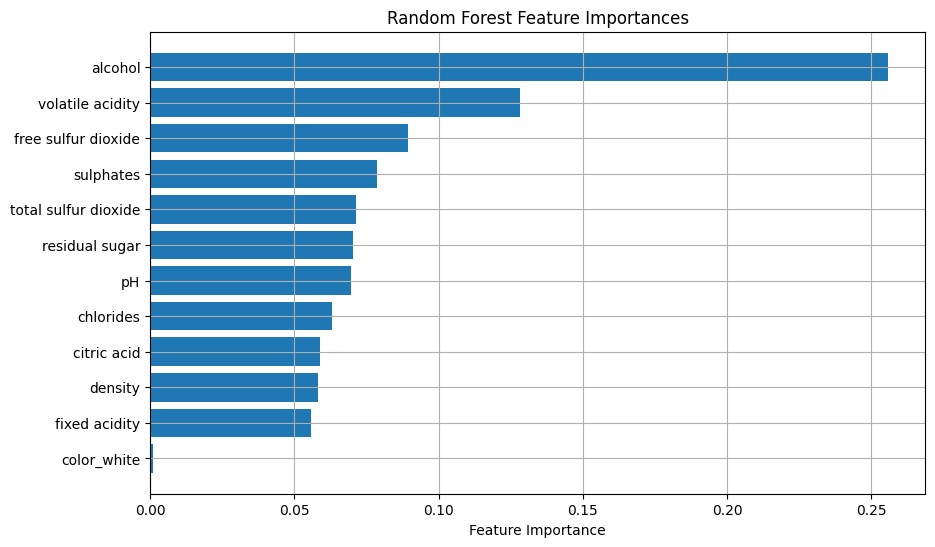

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances from the trained best_rf
importances = best_rf.feature_importances_

# Create a DataFrame for easy plotting
feature_names = X_train.columns  # Assuming your original feature names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Most important feature at the top
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.grid(True)
plt.show()

We selected the Top K features based on feature importances from the full-feature Random Forest model, then retrained the model to evaluate its performance on the reduced feature set.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Assume best_rf is your already trained best Random Forest
importances = best_rf.feature_importances_

# Sort features by importance (descending)
sorted_indices = np.argsort(importances)[::-1]
sorted_features = X_train_scaled.columns[sorted_indices]

# Store results
k_list = []
train_mse_list = []
test_mse_list = []
train_r2_list = []
test_r2_list = []

# Try different k numbers of top features
for k in range(3, len(sorted_features)+1):
    top_k_features = sorted_features[:k]

    # Subset data
    X_train_k = X_train_scaled[top_k_features]
    X_test_k = X_test_scaled[top_k_features]

    # Retrain Random Forest on selected features
    rf_k = RandomForestRegressor(
        n_estimators=500,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        oob_score=True,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
    rf_k.fit(X_train_k, y_train)

    # Predict
    y_train_pred = rf_k.predict(X_train_k)
    y_test_pred = rf_k.predict(X_test_k)

    # Evaluate
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Save results
    k_list.append(k)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)


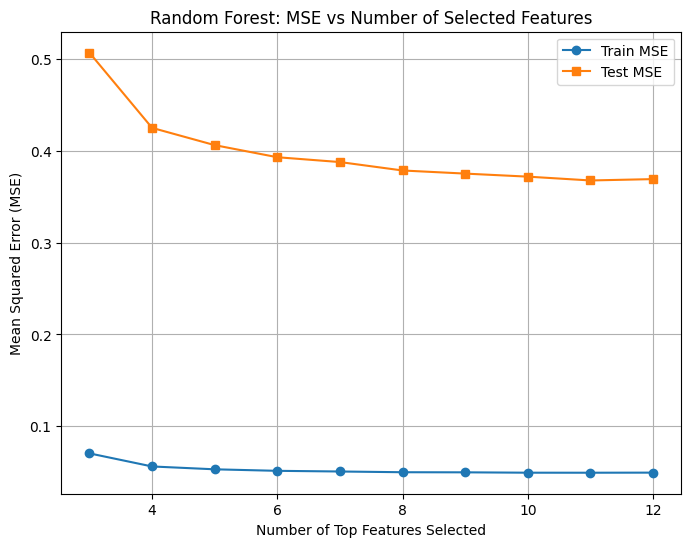

In [63]:
# Plot MSE vs number of features
plt.figure(figsize=(8,6))
plt.plot(k_list, train_mse_list, label='Train MSE', marker='o')
plt.plot(k_list, test_mse_list, label='Test MSE', marker='s')
plt.xlabel('Number of Top Features Selected')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Random Forest: MSE vs Number of Selected Features')
plt.legend()
plt.grid(True)
plt.show()

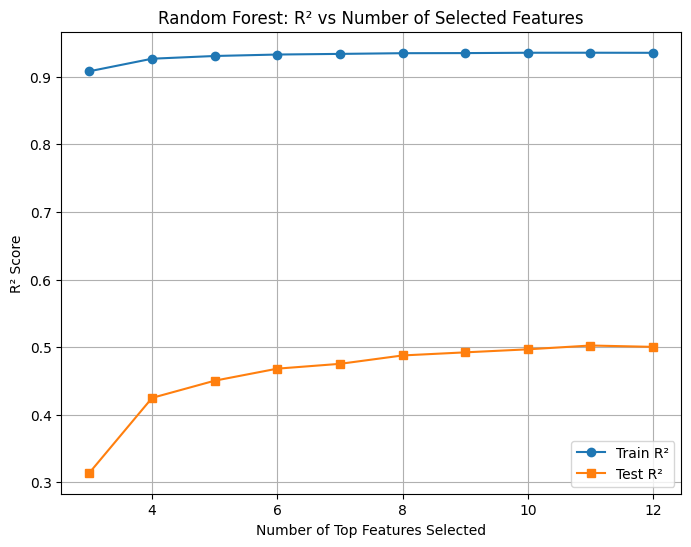

In [64]:
# Plot R² vs number of features
plt.figure(figsize=(8,6))
plt.plot(k_list, train_r2_list, label='Train R²', marker='o')
plt.plot(k_list, test_r2_list, label='Test R²', marker='s')
plt.xlabel('Number of Top Features Selected')
plt.ylabel('R² Score')
plt.title('Random Forest: R² vs Number of Selected Features')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Best k based on lowest Test MSE
best_k_mse = k_list[np.argmin(test_mse_list)]
best_test_mse = min(test_mse_list)

# Best k based on highest Test R²
best_k_r2 = k_list[np.argmax(test_r2_list)]
best_test_r2 = max(test_r2_list)

# Print results
print(f"Best K (Lowest Test MSE): {best_k_mse} with Test MSE = {best_test_mse:.4f}")
print(f"Best K (Highest Test R²): {best_k_r2} with Test R² = {best_test_r2:.4f}")

Best K (Lowest Test MSE): 11 with Test MSE = 0.3675
Best K (Highest Test R²): 11 with Test R² = 0.5024


Summary for Nonlinear Models Performance:

Random Forest and Gradient Boosting performed similarly, but Random Forest achieved a slightly higher Test R² and lower Test MSE, and thus was chosen as the final model.

**Model Selection Summary**

Based on model comparisons, both tuned Random Forest and Gradient Boosting models demonstrated strong performance on the wine quality prediction task. While their results were close, Random Forest achieved a slightly higher Test R² and lower Test MSE, and also showed robust Out-of-Bag (OOB) validation performance. Given its better generalization ability and model stability, the tuned Random Forest was selected as the final model for this project.

**Feature Importance Summary**

- "Alcohol" is clearly the most important predictor in both Random Forest and Gradient Boosting.
- "Volatile acidity" and "free sulfur dioxide" also consistently rank highly.
- "Color_white" (the variable we added to represent red vs white wine) is ranked the least important.

Even though color (red or white) is an obvious difference between wines,
it does not strongly influence the predicted wine quality once other chemical properties are known. This suggests that, once physicochemical properties are accounted for, the color of the wine provides minimal additional predictive value for quality.

**Dataset Source**

Cortez, Paulo, et al. "Wine Quality." UCI Machine Learning Repository, 2009, https://doi.org/10.24432/C56S3T.